ML for Loan Default Prediction Project

Overview:
Welcome to the ML for Loan Default Prediction project! This project focuses on developing a machine learning model to predict loan default based on historical customer data.

Project Structure:

The project directory is organized as follows:

Project: ML for Loan Default Prediction ("\Final Project German Bank")

Folders:

1. data:
   - This folder contains the dataset 'German_bank.csv' used for training and testing the machine learning models.
   - Path: "\Final Project German Bank\data".

2. code:
   - The "code" folder houses all the Python scripts required for various stages of the project.
   - It includes:
     - data folder: This folder consists of 'cleaned_data.csv', which contains the cleaned data from the provided original data.
       - Path: "\Final Project German Bank\code\data\cleaned_data.csv".
     - data_preprocessing.py: This script is responsible for reading, exploring, and cleaning the data.
       - Path: "\Final Project German Bank\code\data_preprocessing.py".
     - data_visualization.py: Here, you'll find code related to data manipulation, wrangling, and visualization.
       - Path: "\Final Project German Bank\code\data_visualization.py".
     - model_training.py: This script handles the training of machine learning models and the generation of related figures and tables.
       - Path: "\Final Project German Bank\code\model_training.py".

3. reports:
   - In this folder, you'll discover the final project report presented in PDF format.
   - Path: "\Final Project German Bank\report".

How to Use:

1. Begin by exploring the dataset located in the "data" folder:
   - Path: "\Final Project German Bank\data\German_bank.csv".

2. To preprocess the data, navigate to the "code" folder and use the "data_preprocessing.py" script.

3. For data visualization and manipulation, take a look at the "data_visualization.py" script.

4. To train machine learning models and generate figures and tables, use the "model_training.py" script.

5. The final project report can be found in the "reports" folder:
   - Path: "\Final Project German Bank\report".


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os

# Read the dataset
data = pd.read_csv("C:\\Users\\Mrunal Jadhav\\OneDrive\\Desktop\\Final Project German Bank\\data\\credit.csv")

# Display basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Perform data cleaning and preprocessing (e.g., encoding categorical variables, handling missing values)
# ...
# Encode categorical variables
categorical_cols = ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Save the cleaned data to a new CSV file within the 'data' directory
if not os.path.exists('data'):
    os.makedirs('data')
# Save the cleaned data to a new CSV file
data.to_csv('data/cleaned_data.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
cleaned_data = pd.read_csv('data/cleaned_data.csv')

# Basic data exploration
print(cleaned_data.head())  # Display the first few rows of the dataset
print(cleaned_data.info())  # Display information about the dataset


   checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                 1                     6               0        4    1169   
1                 0                    48               1        4    5951   
2                 3                    12               0        3    2096   
3                 1                    42               1        4    7882   
4                 1                    24               3        1    4870   

   savings_balance  employment_duration  percent_of_income  \
0                4                    3                  4   
1                2                    0                  2   
2                2                    1                  2   
3                2                    1                  2   
4                2                    0                  3   

   years_at_residence  age  other_credit  housing  existing_loans_count  job  \
0                   4   67             1        1                     2    1  

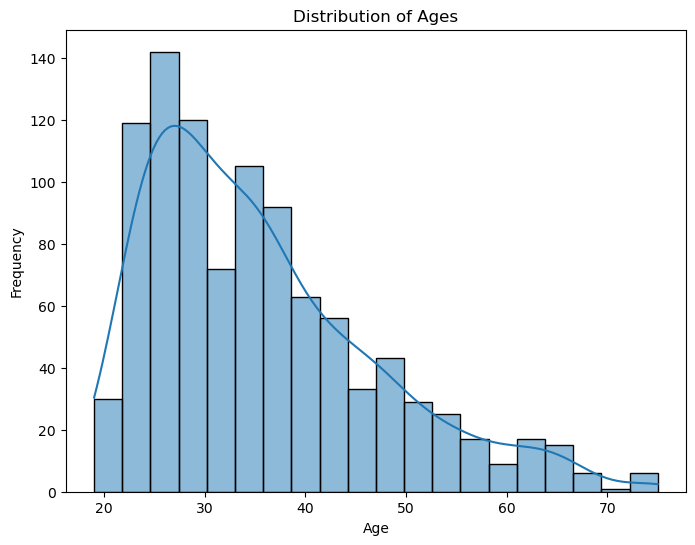

In [3]:
# Data visualization
# Create a histogram of ages
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data['age'], bins=20, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


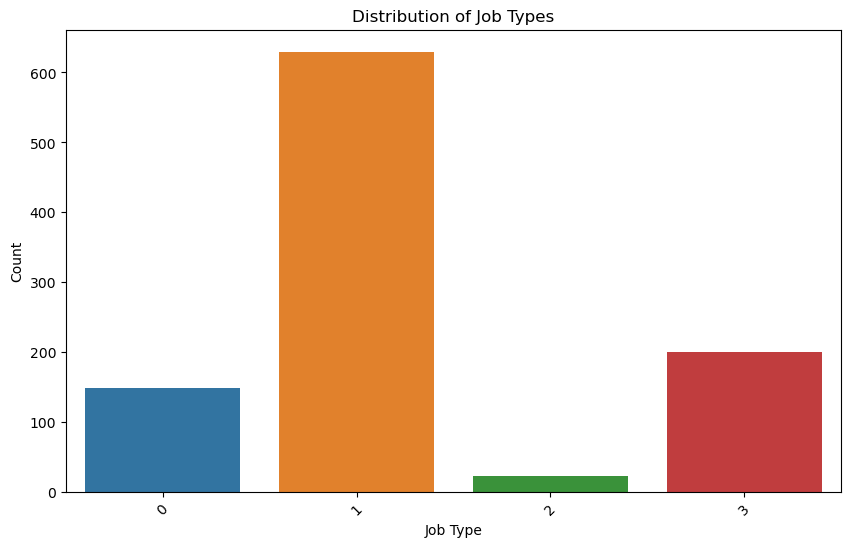

In [4]:
# Convert the 'job' column to categorical type
cleaned_data['job'] = cleaned_data['job'].astype('category')

# Create a bar plot of job types
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='job')
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

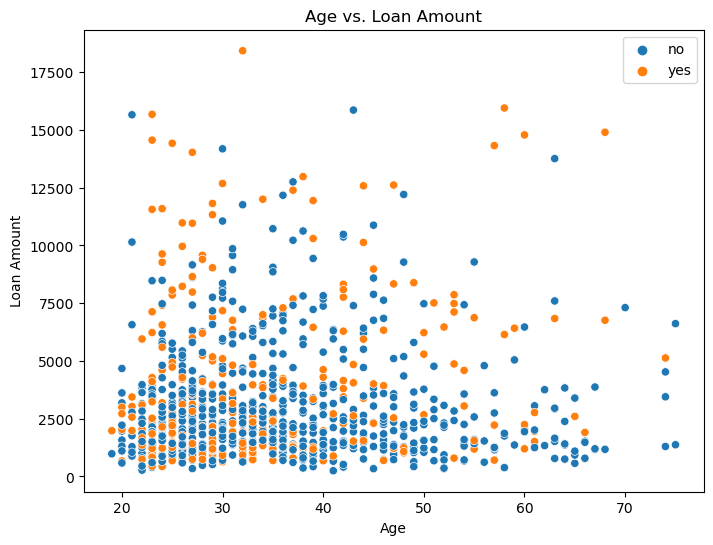

In [5]:
#Create a scatter plot of age vs. loan amount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_data, x='age', y='amount', hue='default')
plt.title('Age vs. Loan Amount')
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()

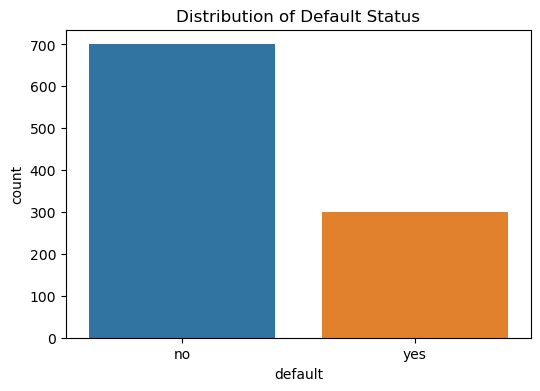

In [6]:
# Visualize distribution of default status
plt.figure(figsize=(6, 4))
sns.countplot(x='default', data=cleaned_data)
plt.title('Distribution of Default Status')
plt.show()

C:\Users\Mrunal Jadhav\AppData\Local\Temp\ipykernel_18848\1793065587.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_data.corr(), annot=True, cmap='coolwarm')


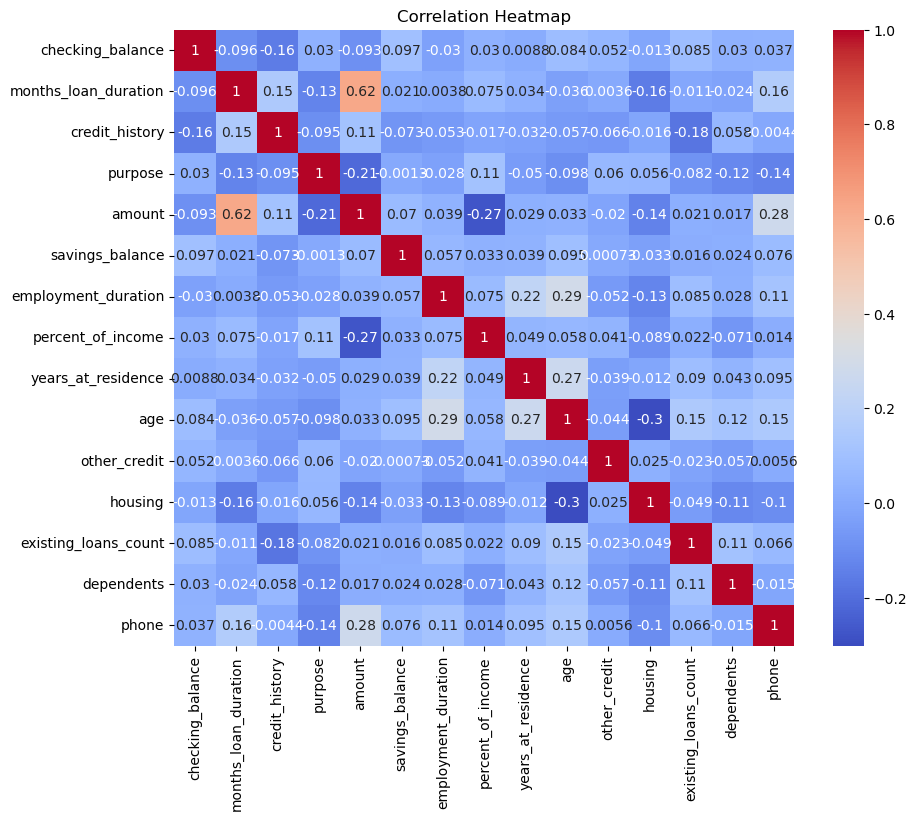

In [7]:
# Visualize correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(cleaned_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

# Load cleaned data
cleaned_data = pd.read_csv('data/cleaned_data.csv') 

# Encode categorical variables
label_encoder = LabelEncoder()
for col in cleaned_data.select_dtypes(include=['object']).columns:
    cleaned_data[col] = label_encoder.fit_transform(cleaned_data[col])

In [9]:
# Split data into features (X) and target (y)
X = cleaned_data.drop('default', axis=1)
y = cleaned_data['default']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    results[model_name] = {'accuracy': accuracy, 'classification_report': classification_rep}

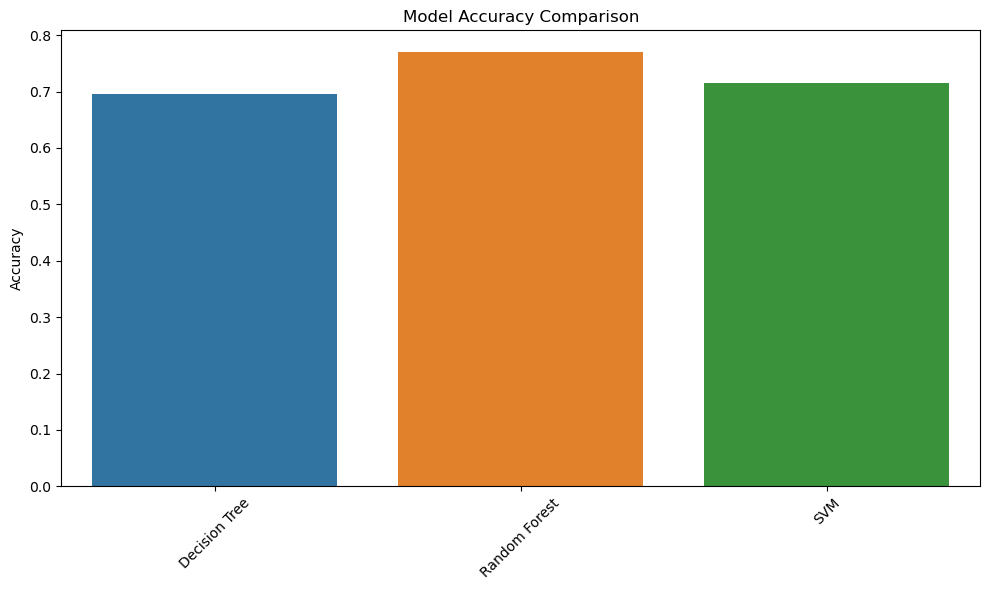

In [10]:
# Generate figures or tables
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=[result['accuracy'] for result in results.values()])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()

In [11]:
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print("Classification Report:")
    print(result['classification_report'])
    print()

# Save the figure
plt.savefig('accuracy_comparison.png')

print("Training and evaluation completed.")

Model: Decision Tree
Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       141
           1       0.48      0.47      0.48        59

    accuracy                           0.69       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.69      0.69      0.69       200


Model: Random Forest
Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       141
           1       0.68      0.42      0.52        59

    accuracy                           0.77       200
   macro avg       0.73      0.67      0.68       200
weighted avg       0.76      0.77      0.75       200


Model: SVM
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.99      0.83       141
           1       0.75      0.05      0.10        59

    accuracy 

<Figure size 640x480 with 0 Axes>

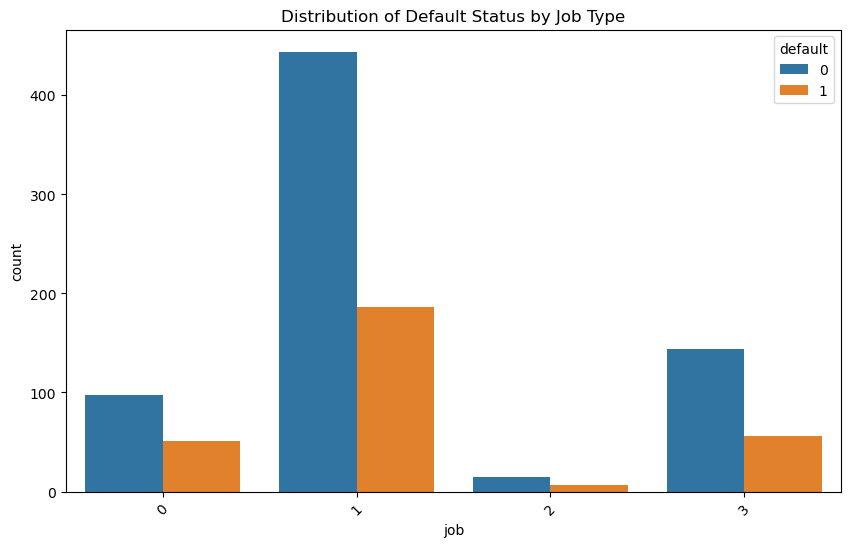

In [12]:

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Generate a bar plot showing the distribution of default status based on job type
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='default', data=cleaned_data)
plt.title('Distribution of Default Status by Job Type')
plt.xticks(rotation=45)
plt.show()

